In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math

A1

In [2]:
data = {'age': ['<=30','<=30','31..40','>40','>40','>40','31..40','<=30','<=30','>40','<=30','31..40','31..40','>40',],
        'income': ['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
        'students': ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
        'credits_rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
        'buys_computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
        }
df = pd.DataFrame(data, columns= ['age', 'income','students','credits_rating','buys_computer'])
print (df)

       age  income students credits_rating buys_computer
0     <=30    high       no           fair            no
1     <=30    high       no      excellent            no
2   31..40    high       no           fair           yes
3      >40  medium       no           fair           yes
4      >40     low      yes           fair           yes
5      >40     low      yes      excellent            no
6   31..40     low      yes      excellent           yes
7     <=30  medium       no           fair            no
8     <=30     low      yes           fair           yes
9      >40  medium      yes           fair           yes
10    <=30  medium      yes      excellent           yes
11  31..40  medium       no      excellent           yes
12  31..40    high      yes           fair           yes
13     >40  medium       no      excellent            no


In [3]:
sv=list(df['buys_computer'])
p1=sv.count('yes')/len(sv)
p2=sv.count('no')/len(sv)
s1=-p1*math.log(p1,2)
s2=-p2*math.log(p2,2)
S=s1+s2
S


0.9402859586706309

In [4]:
def entropy_cal(s):
    my_list=list(df[s].unique())
    s_list=[]
    l_list=[]
    for i in my_list:
        st,l=entropy(s,i)
        s_list.append(st)
        l_list.append(l)
    t=total(s_list,l_list)
    return t   

In [5]:
def entropy(s,v):
    mylist=list(df[df[s]==v]['buys_computer'])
    x=mylist.count('yes')
    l=len(mylist)
    y=l-x
    p1=x/l
    p2=y/l
    if p1==0:
        s2=-p2*math.log(p2,2)
        return s2,l
    elif p2==0:
        s1=-p1*math.log(p1,2)
        return s1,l
    else:   
        s1=-p1*math.log(p1,2)
        s2=-p2*math.log(p2,2)
        return (s1+s2),l

In [6]:
def total(l1,l2):
    s=0
    for i in range(0,len(l1)):
        s=s+(l2[i]/sum(l2))*(l1[i])
    return s  

In [7]:
ent_age=entropy_cal('age')
Gain_age=S-ent_age
print(ent_age)
print(Gain_age)

0.6935361388961918
0.2467498197744391


In [8]:
ent_income=entropy_cal('income')
Gain_income=S-ent_income
print(ent_income)
print(Gain_income)

0.9110633930116763
0.029222565658954647


In [9]:
ent_students=entropy_cal('students')
Gain_students=S-ent_students
print(ent_students)
print(Gain_students)

0.7884504573082896
0.15183550136234136


In [10]:
ent_credit=entropy_cal('credits_rating')
Gain_credit=S-ent_credit
print(ent_credit)
print(Gain_credit)

0.8921589282623617
0.04812703040826927


A2

In [11]:
sk_lt=[]
for i in range(200,6019):
    sk_lt.append(i)
    

In [12]:
s=pd.read_csv("C:\\Users\\vigne\\Downloads\\train.csv",skiprows=sk_lt)

In [13]:
s.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,200.000000,200.000000,200.000000,199.000000,200.00000
mean,128.595000,2013.295000,58976.560000,5.261307,9.47580
std,422.460418,3.013867,35969.137032,0.811571,9.83406
min,0.000000,2005.000000,1000.000000,2.000000,0.85000
25%,49.750000,2012.000000,35871.750000,5.000000,3.49500
50%,99.500000,2014.000000,54000.000000,5.000000,5.67500
75%,149.250000,2016.000000,72000.000000,5.000000,10.99000
max,6018.000000,2019.000000,262000.000000,8.000000,55.76000


In [14]:
for i in range(0,len(s[['Power']])):
    if pd.isna(i)==True:
        s['Power'][i]='0'
    elif s['Power'][i]=='null bhp':
        s['Power'][i]='0'


<ipython-input-14-16914dd481f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Power'][i]='0'


In [15]:
df=s[['Kilometers_Driven']]
df1= s[['Mileage','Engine','Power','Seats']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df2=pd.concat([df,df1],axis=1, join='inner')
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Engine'] = df2['Engine'].astype(float)
df2['Power'] =df2['Power'].astype(float)
df2=df2.fillna(0)
df2

,Kilometers_Driven,Mileage,Engine,Power,Seats
0,72000,26.60,998.0,58.16,5.0
1,41000,19.67,1582.0,126.20,5.0
2,46000,18.20,1199.0,88.70,5.0
3,87000,20.77,1248.0,88.76,7.0
4,40670,15.20,1968.0,140.80,5.0
...,...,...,...,...,...
195,52000,25.80,1498.0,98.60,5.0
196,43571,20.36,1197.0,78.90,5.0
197,50000,25.80,1498.0,98.60,5.0
198,113000,17.50,1896.0,106.00,5.0


In [16]:
x=df2.values.tolist()
len(x)

200

In [17]:
def arr(y):
    x=[]
    for i in range(0,len(y)):
        for j in range(0,len(y[i])):
            x.append(y[i][j])
    return x

In [18]:
def conv(y):
    x=[]
    for i in range(0,len(y)):
        y[i]=int(y[i])

In [19]:
df3=s[['Price']]
df3= df3[['Price']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df3['Price'] = df3['Price'].astype(float)
y=df3.values.tolist()
y=arr(y)
conv(y)
len(y)

200

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
ml_model = DecisionTreeClassifier()
ml_model = ml_model.fit(X_train, y_train)

In [22]:
ml_model.score(X_train, y_train)

1.0

In [23]:
ml_model.score(X_test, y_test)

0.075

A3

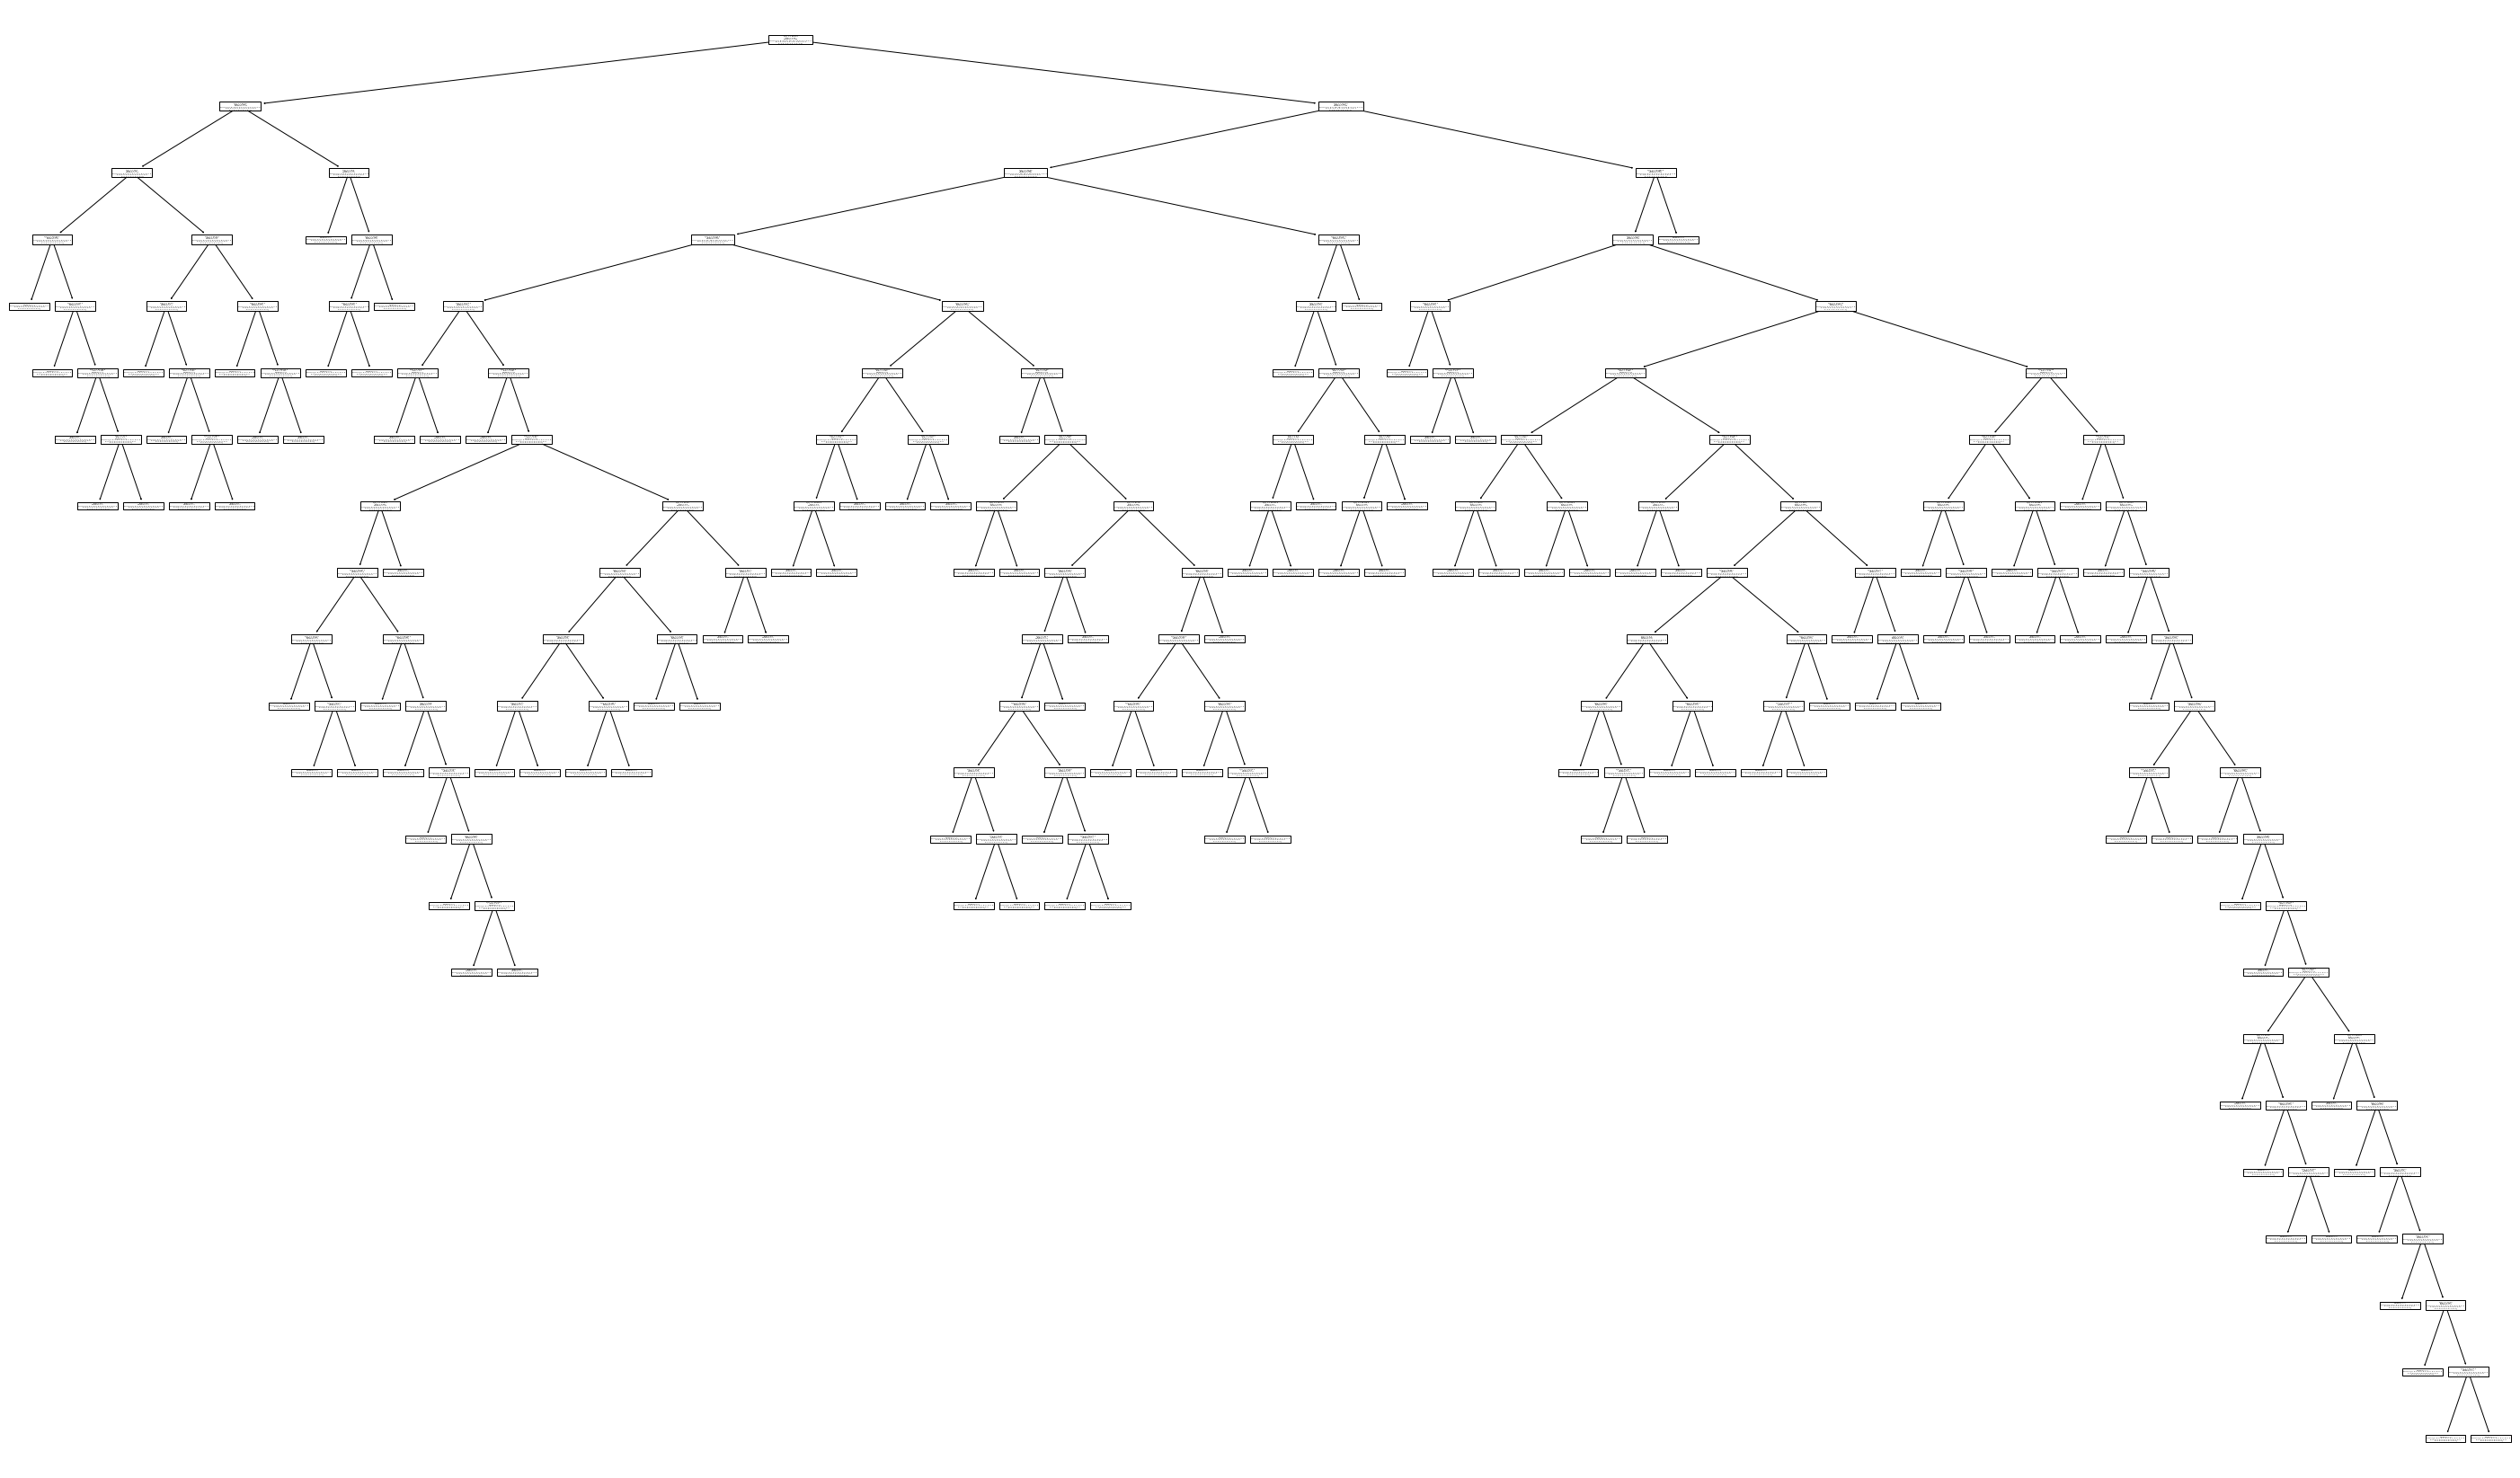

In [24]:
plt.figure(figsize=(50, 30))
tree.plot_tree(ml_model)
plt.show()

A4

In [25]:
ml_model1 = DecisionTreeClassifier(criterion="entropy")
ml_model1 = ml_model.fit(X_train, y_train)

In [26]:
ml_model1.score(X_train, y_train)

1.0

In [27]:
ml_model1.score(X_test, y_test)

0.075

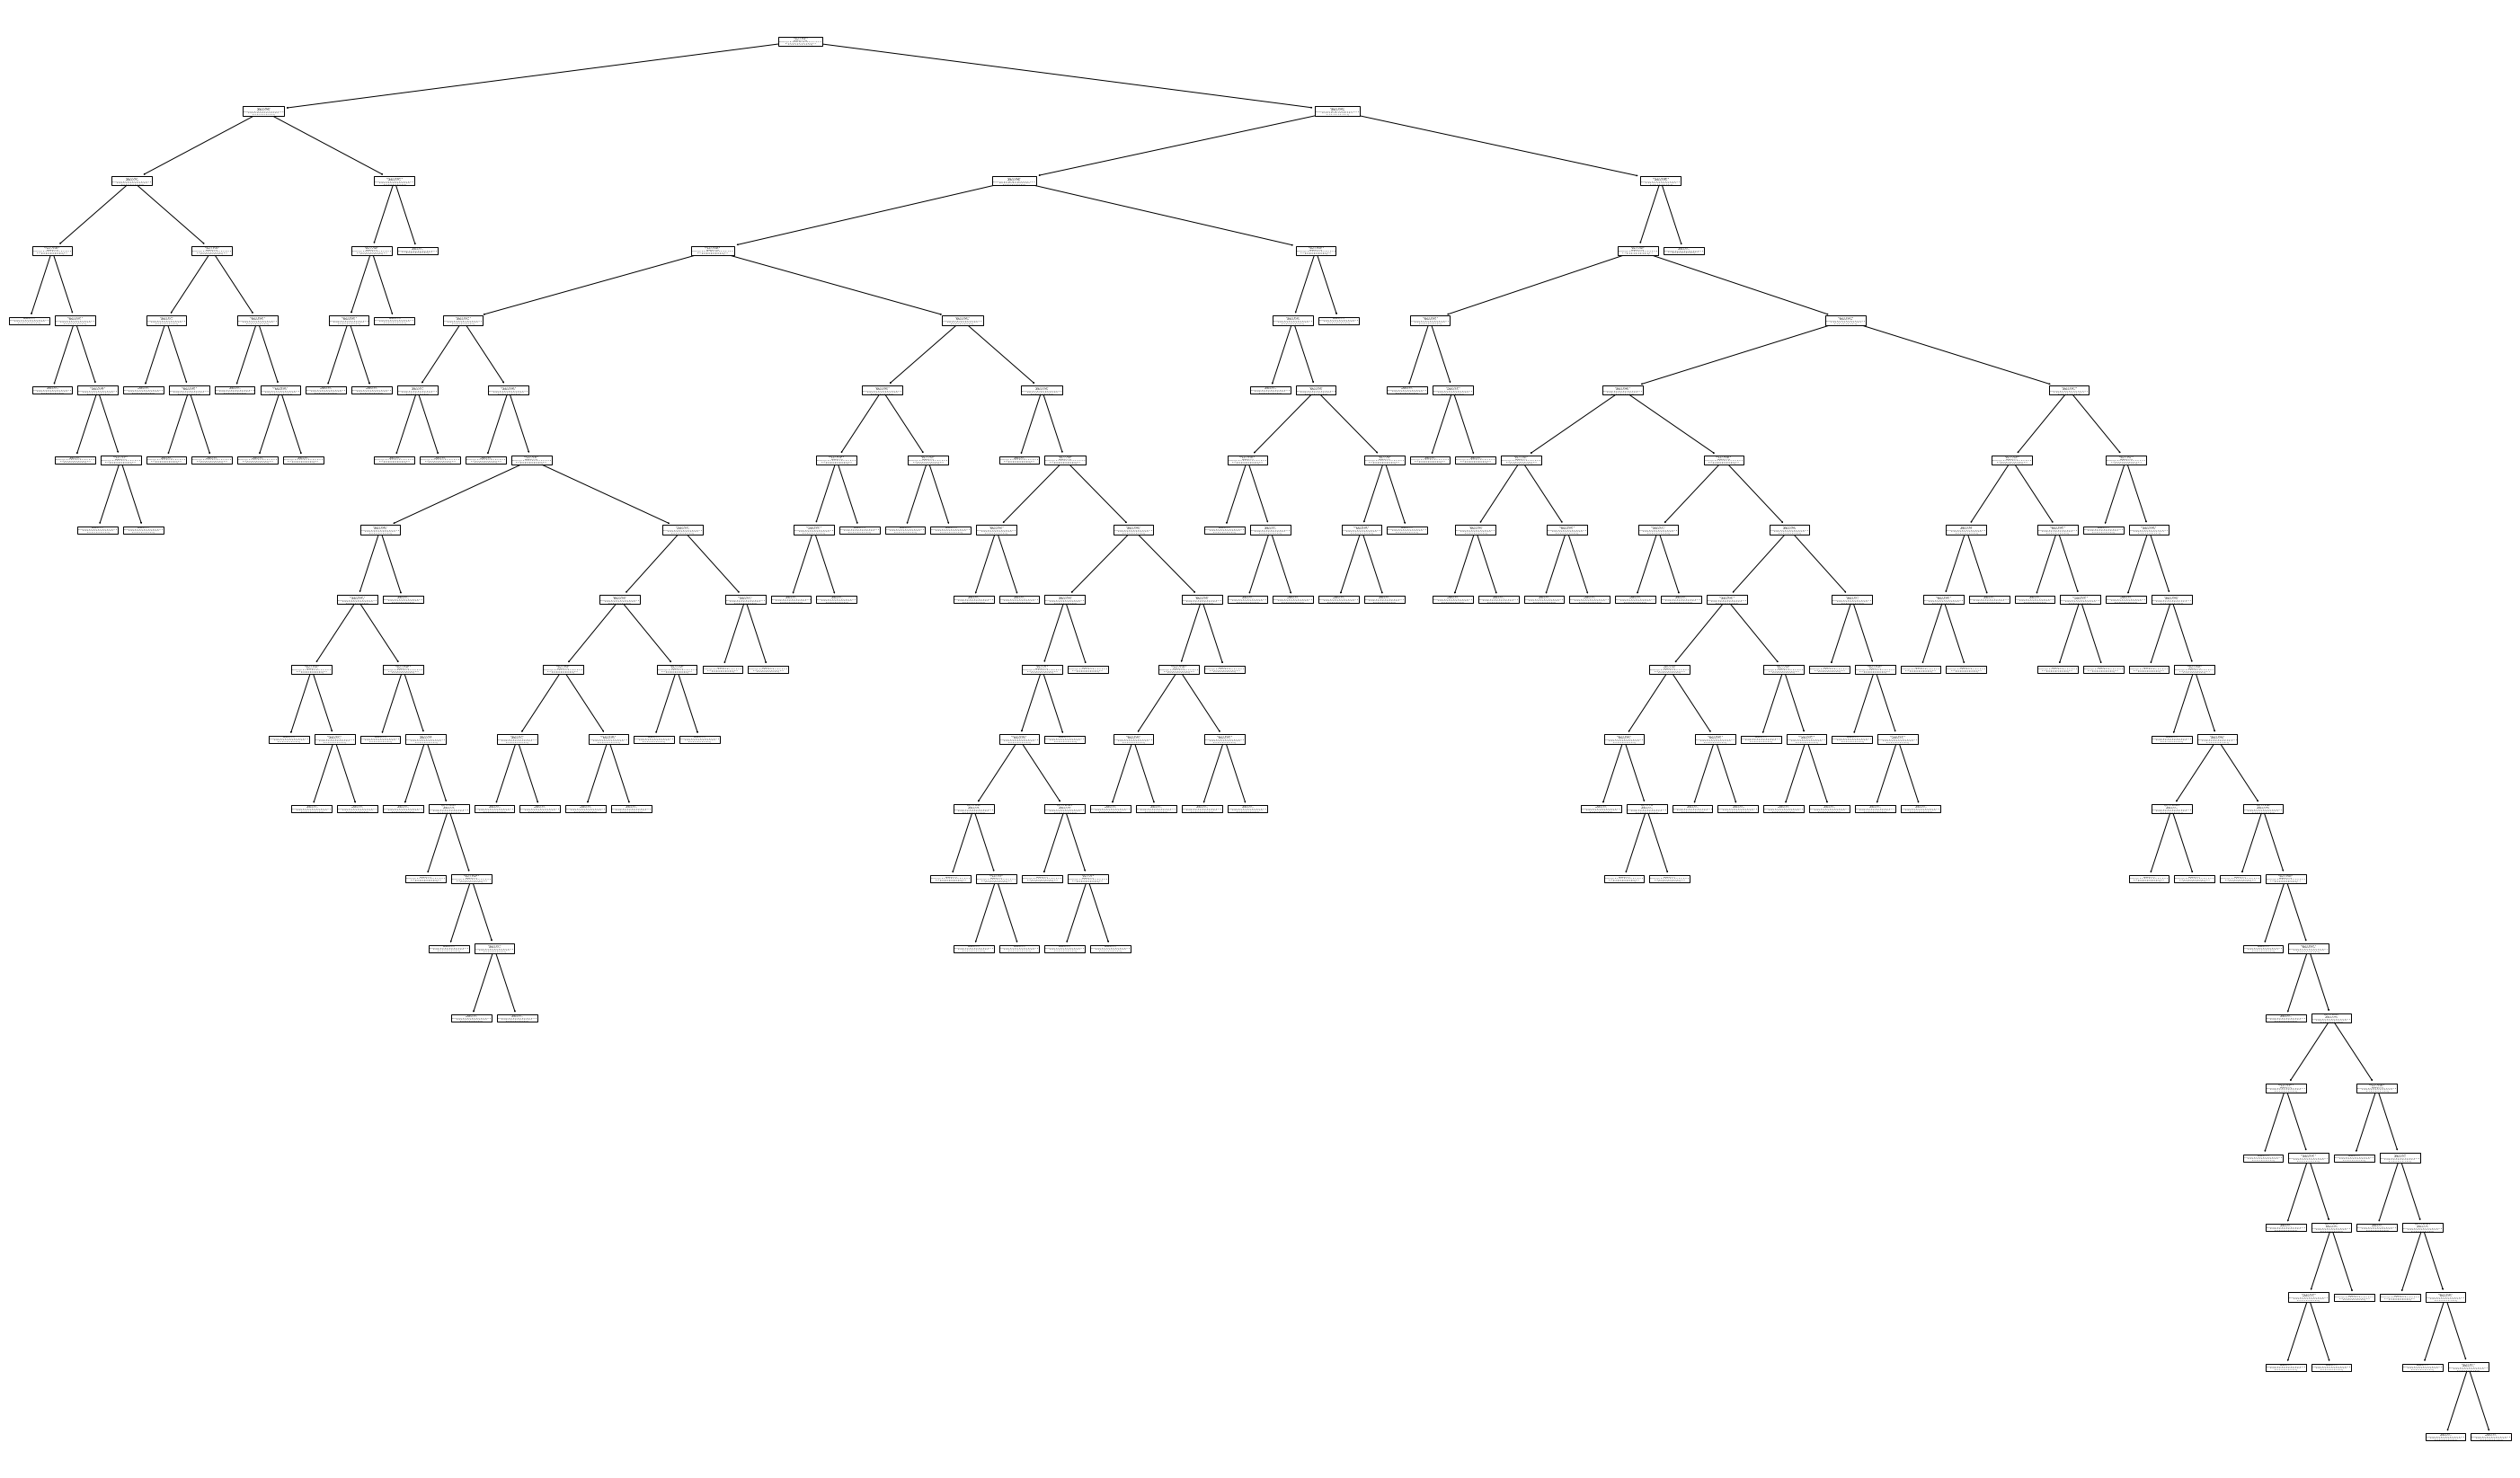

In [28]:
plt.figure(figsize=(50, 30))
tree.plot_tree(ml_model1)
plt.show()